# Data Analysis

## Setup

In [226]:
library(feather)
library(tidyverse)
library(viridis)
library(broom)
library(lubridate)
library(entropy)

In [227]:
df_name <- "macaco"
df_type <- "next_cell"
df_path <- paste("/data/users_data/douglas/data/", df_name, "_tsas_", df_type, ".tsv", sep = "")

In [228]:
df <- read_tsv(df_path, guess_max = 100000)


-- Column specification --------------------------------------------------------
cols(
  .default = col_double(),
  device_id = col_character(),
  timestamp = col_datetime(format = "")
)
i<U+00A0>Use `spec()` for the full column specifications.



# Data pre-processing

In [229]:
# Compute weekday and hour of day as separate columns.
df <- df %>%
    mutate(wd = as.factor(wday(timestamp)), hd = as.factor(hour(timestamp)))

In [230]:
# Change device_ids to start from one.
all_levels = unique(c(as.character(df$device_id)))
df <- df %>%
    mutate(device_id = as.numeric(factor(df$device_id, levels=all_levels)))

In [231]:
head(df)

measurement_id,device_id,timestamp,grid_id,grid_id300,grid_id400,grid_id500,grid_id600,grid_id700,grid_id800,⋯,entropy_seq_split_weekday,entropy_seq_merge_weekday,predictability_seq_split_weekday,predictability_seq_merge_weekday,entropy_seq_split_hourofday,entropy_seq_merge_hourofday,predictability_seq_split_hourofday,predictability_seq_merge_hourofday,wd,hd
<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
434778,1,2015-03-17 11:06:42,1843891497,819515606,460961560,295014247,204885107,150527670,115245044,⋯,0.4487424,0.4250529,0.953,0.956,0.6196407,0.6965125,0.931,0.92,3,11
434782,1,2015-03-17 11:10:43,1843891497,819515606,460961560,295014247,204885107,150527670,115245044,⋯,0.4487424,0.4250529,0.953,0.956,0.6196407,0.6965125,0.931,0.92,3,11
434783,1,2015-03-17 11:11:11,1843891497,819515606,460961560,295014247,204885107,150527670,115245044,⋯,0.4487424,0.4250529,0.953,0.956,0.6196407,0.6965125,0.931,0.92,3,11
434785,1,2015-03-17 11:13:11,1843850253,819515606,460961560,295014247,204885107,150527670,115245044,⋯,0.4487424,0.4250529,0.953,0.956,0.6196407,0.6965125,0.931,0.92,3,11
434805,1,2015-03-17 11:19:06,1843850253,819515606,460961561,295014247,204885107,150527670,115245044,⋯,0.4487424,0.4250529,0.953,0.956,0.6196407,0.6965125,0.931,0.92,3,11
434808,1,2015-03-17 11:21:11,1843891497,819515606,460961560,295014247,204885107,150527670,115245044,⋯,0.4487424,0.4250529,0.953,0.956,0.6196407,0.6965125,0.931,0.92,3,11


In [232]:
colnames(df)

[1] "measurement_id"                     "device_id"                         
 [3] "timestamp"                          "grid_id"                           
 [5] "grid_id300"                         "grid_id400"                        
 [7] "grid_id500"                         "grid_id600"                        
 [9] "grid_id700"                         "grid_id800"                        
[11] "grid_id900"                         "grid_id1000"                       
[13] "regularity"                         "stationarity"                      
[15] "diversity"                          "regularity300"                     
[17] "stationarity300"                    "diversity300"                      
[19] "regularity400"                      "stationarity400"                   
[21] "diversity400"                       "regularity500"                     
[23] "stationarity500"                    "diversity500"                      
[25] "regularity600"                      "stationarity600"                   
[27] "diversity600"                       "regularity700"                     
[29] "stationarity700"                    "diversity700"                      
[31] "regularity800"                      "stationarity800"                   
[33] "diversity800"                       "regularity900"                     
[35] "stationarity900"                    "diversity900"                      
[37] "regularity1000"                     "stationarity1000"                  
[39] "diversity1000"                      "baseline_entropy"                  
[41] "actual_entropy"                     "baseline_predictability"           
[43] "actual_predictability"              "baseline_entropy300"               
[45] "actual_entropy300"                  "baseline_predictability300"        
[47] "actual_predictability300"           "baseline_entropy400"               
[49] "actual_entropy400"                  "baseline_predictability400"        
[51] "actual_predictability400"           "baseline_entropy500"               
[53] "actual_entropy500"                  "baseline_predictability500"        
[55] "actual_predictability500"           "baseline_entropy600"               
[57] "actual_entropy600"                  "baseline_predictability600"        
[59] "actual_predictability600"           "baseline_entropy700"               
[61] "actual_entropy700"                  "baseline_predictability700"        
[63] "actual_predictability700"           "baseline_entropy800"               
[65] "actual_entropy800"                  "baseline_predictability800"        
[67] "actual_predictability800"           "baseline_entropy900"               
[69] "actual_entropy900"                  "baseline_predictability900"        
[71] "actual_predictability900"           "baseline_entropy1000"              
[73] "actual_entropy1000"                 "baseline_predictability1000"       
[75] "actual_predictability1000"          "entropy_seq_split_weekday"         
[77] "entropy_seq_merge_weekday"          "predictability_seq_split_weekday"  
[79] "predictability_seq_merge_weekday"   "entropy_seq_split_hourofday"       
[81] "entropy_seq_merge_hourofday"        "predictability_seq_split_hourofday"
[83] "predictability_seq_merge_hourofday" "wd"                                
[85] "hd"

In [233]:
# CDR: At least 20% of locations (Song's paper): total locations = 360, so 72 is 20%
df <- df %>%
    group_by(device_id) %>%
    filter(n() > (if_else(df_name == "shanghai", 72, 500)))

In [234]:
df %>%
    group_by(device_id) %>%
    summarise(n = n()) %>%
    nrow()

[1] 51

# Number of locations and unique locations for each user

Saving 6.67 x 6.67 in image


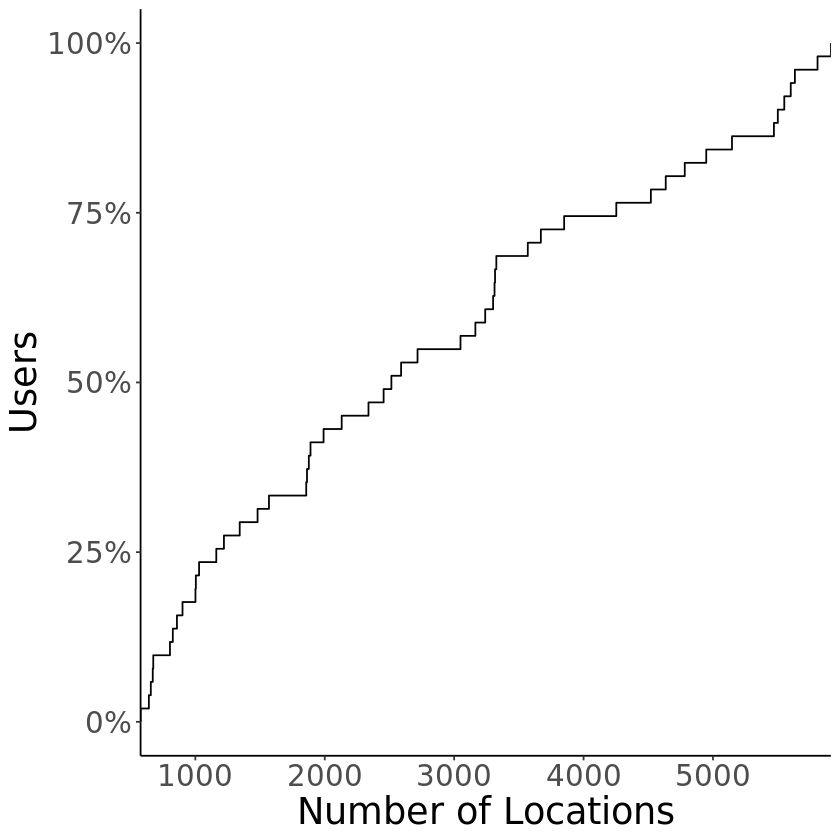

In [235]:
df %>%
    group_by(device_id) %>%
    summarise(n = n(), nunique = n_distinct(grid_id)) %>%
    ggplot() +
    stat_ecdf(aes(n), geom = "step") +
    scale_y_continuous(labels = scales::percent) +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5), 
        text = element_text(size=22),
        legend.justification = c(1, 0.01),
        legend.position = c(0.99, 0.01)
         ) +
  scale_x_continuous(
    expand = c(0, 0),
    #breaks = c(0, 0.5, 0.75, 0.9, 1.00),
    #labels = c(0, 0.5, 0.75, 0.9, 1)
  ) +
    labs(y = "Users", x = "Number of Locations")

prefix <- "images/CDFLocationsPerUser"
fname <- paste(prefix, df_name, df_type, ".pdf", sep="_")
ggsave(plot=last_plot(), filename = fname, device = "pdf")
embedFonts(fname)


Saving 6.67 x 6.67 in image


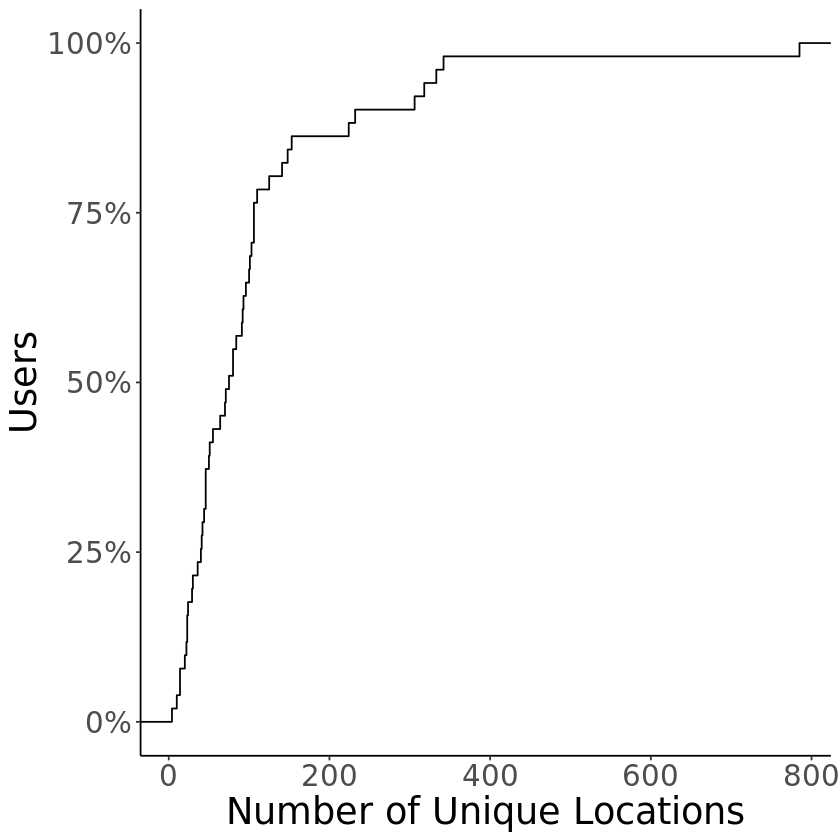

In [236]:
df %>%
    group_by(device_id) %>%
    summarise(n = n(), nunique = n_distinct(grid_id)) %>%
    ggplot() +
    stat_ecdf(aes(nunique), geom = "step") +
    scale_y_continuous(labels = scales::percent) +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5), 
        text = element_text(size=22),
        legend.justification = c(1, 0.01),
        legend.position = c(0.99, 0.01)
         ) +
    labs(y = "Users", x = "Number of Unique Locations")

prefix <- "images/CDFUniqueLocationsPerUser"
fname <- paste(prefix, df_name, df_type, ".pdf", sep="_")
ggsave(plot=last_plot(), filename = fname, device = "pdf")
embedFonts(fname)


## Statistics about metrics

In [237]:
# Statistics about locations

df %>%
    group_by(device_id) %>%
    summarise(n = n()) %>%
    summarise(avg_n = mean(n), std_n = sd(n), min_n = min(n), max_n = max(n))

avg_n,std_n,min_n,max_n
<dbl>,<dbl>,<int>,<int>
2788.255,1712.564,577,5911


In [238]:
# Statistics about entropy (average per user)

df %>%
    group_by(device_id) %>%
    filter(device_id == 3) %>%
    summarise(n = n(), 
              n_unique = n_distinct(grid_id), 
              actual_entropy = mean(actual_entropy), 
              entropy_seq_split_weekday = mean(entropy_seq_split_weekday),
              entropy_seq_split_hourofday = mean(entropy_seq_split_hourofday),
              #entropy_seq_split_weather = mean(entropy_seq_split_weather),
              entropy_seq_merge_weekday = mean(entropy_seq_merge_weekday),
              entropy_seq_merge_hourofday = mean(entropy_seq_merge_hourofday),
              #entropy_seq_merge_weather = mean(entropy_seq_merge_weather),
              st = mean(stationarity),
              reg = mean(regularity),
              div = mean(diversity)
             )

device_id,n,n_unique,actual_entropy,entropy_seq_split_weekday,entropy_seq_split_hourofday,entropy_seq_merge_weekday,entropy_seq_merge_hourofday,st,reg,div
<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,5551,342,0.3924311,0.5162246,1.027878,0.4792117,0.4405941,84.2,93.84,0.9883172


In [239]:
# Statistics about entropy (average whole dataset)

df %>%
    group_by(device_id) %>%
    filter(n() > (if_else(df_name == "shanghai", 72, 500))) %>%
    summarise(actual_entropy = mean(actual_entropy),
              entropy_seq_split_weekday = mean(entropy_seq_split_weekday),
              entropy_seq_split_hourofday = mean(entropy_seq_split_hourofday),   
              #entropy_seq_split_weather = mean(entropy_seq_split_weather),   
              entropy_seq_merge_weekday = mean(entropy_seq_merge_weekday),
              entropy_seq_merge_hourofday = mean(entropy_seq_merge_hourofday),
              #entropy_seq_merge_weather = mean(entropy_seq_merge_weather),
             ) %>%
    summarise(actual_entropy = mean(actual_entropy),
              entropy_seq_split_weekday = mean(entropy_seq_split_weekday),
              entropy_seq_split_hourofday = mean(entropy_seq_split_hourofday),   
              #entropy_seq_split_weather = mean(entropy_seq_split_weather),   
              entropy_seq_merge_weekday = mean(entropy_seq_merge_weekday),
              entropy_seq_merge_hourofday = mean(entropy_seq_merge_hourofday),
              #entropy_seq_merge_weather = mean(entropy_seq_merge_weather),
             )

actual_entropy,entropy_seq_split_weekday,entropy_seq_split_hourofday,entropy_seq_merge_weekday,entropy_seq_merge_hourofday
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3287179,0.4440841,0.8646177,0.3694676,0.4818973


In [240]:
# Statistics about regularity, stationarity, and diversity

df_metrics <- df %>%
    group_by(device_id) %>%
    filter(n() > 42) %>%
    summarise(
             n = n(),
             n_unique = n_distinct(grid_id),
             regularity = mean(regularity),
             stationarity = mean(stationarity),
             diversity = mean(diversity),
             entropy = mean(actual_entropy),
             predictability = mean(actual_predictability)
    )

df_averages <- df_metrics %>%
    summarise(regularity = mean(regularity), 
              stationarity = mean(stationarity), 
              diversity = mean(diversity), 
              entropy = mean(entropy)
             )


In [241]:
df_metrics

device_id,n,n_unique,regularity,stationarity,diversity,entropy,predictability
<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5501,14,99.75,76.80,0.9856912,0.32191055,0.968
2,826,24,97.09,91.52,0.8298321,0.18097403,0.985
3,5551,342,93.84,84.20,0.9883172,0.39243111,0.974
4,4253,100,97.65,89.25,0.9703378,0.21706384,0.985
6,2717,125,95.40,77.21,0.9854683,0.61454099,0.952
8,5147,306,94.05,71.16,0.9935893,0.74722140,0.946
9,858,46,94.64,88.68,0.9173295,0.33412194,0.972
10,3316,75,97.74,76.56,0.9908871,0.73562429,0.936
11,3312,91,97.25,92.63,0.9720924,0.27630884,0.980


In [242]:
df_averages

regularity,stationarity,diversity,entropy
<dbl>,<dbl>,<dbl>,<dbl>
96.02216,88.17784,0.9075969,0.3287179


In [243]:
# Correlations between regularity, stationarity, and diversity

# Corr: metrics and entropy
cor(df_metrics$regularity, df_metrics$entropy, method = c("spearman"))
cor(df_metrics$stationarity, df_metrics$entropy, method = c("spearman"))
cor(df_metrics$diversity, df_metrics$entropy, method = c("spearman"))

# Corr: metrics among themselves
cor(df_metrics$regularity, df_metrics$stationarity, method = c("spearman"))
cor(df_metrics$regularity, df_metrics$diversity, method = c("spearman"))
cor(df_metrics$diversity, df_metrics$stationarity, method = c("spearman"))

[1] -0.5526167

[1] -0.8884364

[1] 0.6937557

[1] 0.5025794

[1] -0.2508768

[1] -0.7543157

# Analysis of metrics and outliers

In [244]:
# Outliers with respect to regularity

df_outliers_regularity <- df_metrics %>%
    group_by(device_id) %>%
    summarise(entropy = mean(entropy), regularity = mean(regularity)) %>%
    # We select 5 outliers for the GPS and 20 for the CDR dataset
    top_n(if_else(df_name == "shanghai", 20, 5), regularity)

In [245]:
df_outliers_regularity

device_id,entropy,regularity
<dbl>,<dbl>,<dbl>
1,0.32191055,99.75
22,0.43484656,99.83
36,0.07099464,99.41
39,0.01593254,99.06
53,0.34416364,99.06


In [246]:
head(df_metrics)

device_id,n,n_unique,regularity,stationarity,diversity,entropy,predictability
<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5501,14,99.75,76.80,0.9856912,0.3219106,0.968
2,826,24,97.09,91.52,0.8298321,0.1809740,0.985
3,5551,342,93.84,84.20,0.9883172,0.3924311,0.974
4,4253,100,97.65,89.25,0.9703378,0.2170638,0.985
6,2717,125,95.40,77.21,0.9854683,0.6145410,0.952
8,5147,306,94.05,71.16,0.9935893,0.7472214,0.946


Saving 6.67 x 6.67 in image


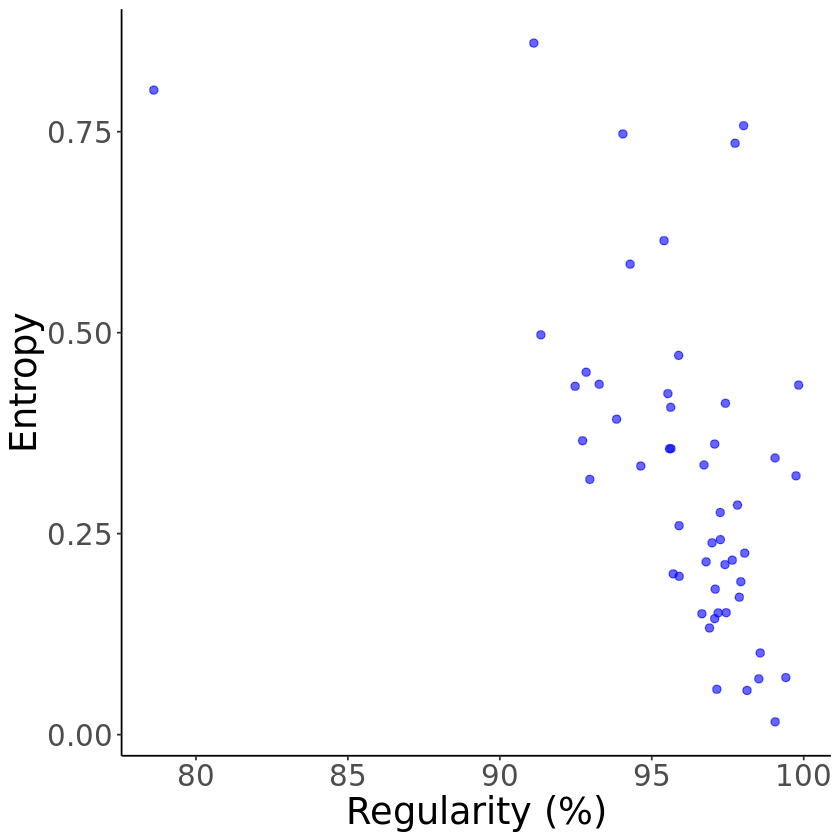

In [247]:
df_metrics %>%
    # sample_n(500) %>% # CDR
    group_by(device_id) %>%
    ggplot(aes(x = regularity, y = entropy)) +
    geom_point(shape = if_else(df_name == "shanghai", 1, 19), alpha = 0.6, colour = 'blue', size = 2, position = "jitter") +
    #geom_point(data=df_outliers_regularity, shape=8, size=3, color = 'red') + # GPS
    #geom_point(shape = 20, alpha = 0.6, colour = 'blue', size = 3) + # CDR
    #geom_point(data=df_outliers_regularity, shape = 1, alpha = 0.6, colour = 'blue', size = 2) + # CDR
    #lims(x = c(0.7, 1.0)) + # CDR
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5), 
        text = element_text(size=22),
        legend.justification = c(1, 0.01),
        legend.position = c(0.99, 0.01)
         ) +
    labs(y = "Entropy", x = "Regularity (%)")


prefix <- "images/RegularityEntropy"
fname <- paste(prefix, df_name, df_type, ".pdf", sep="_")
ggsave(plot=last_plot(), filename = fname, device = "pdf")
embedFonts(fname)

In [248]:
# Outliers with respect to stationarity

df_outliers_stationarity <- df_metrics %>%
    group_by(device_id) %>%
    summarise(entropy = mean(entropy), stationarity = mean(stationarity)) %>%
    # We select 5 outliers for the GPS and 20 for the CDR dataset
    top_n(if_else(df_name == "shanghai", 20, 5), stationarity)

In [249]:
df_outliers_stationarity

device_id,entropy,stationarity
<dbl>,<dbl>,<dbl>
21,0.10155827,96.30
36,0.07099464,99.41
39,0.01593254,98.47
44,0.05630825,96.64
56,0.06943487,96.76


Saving 6.67 x 6.67 in image


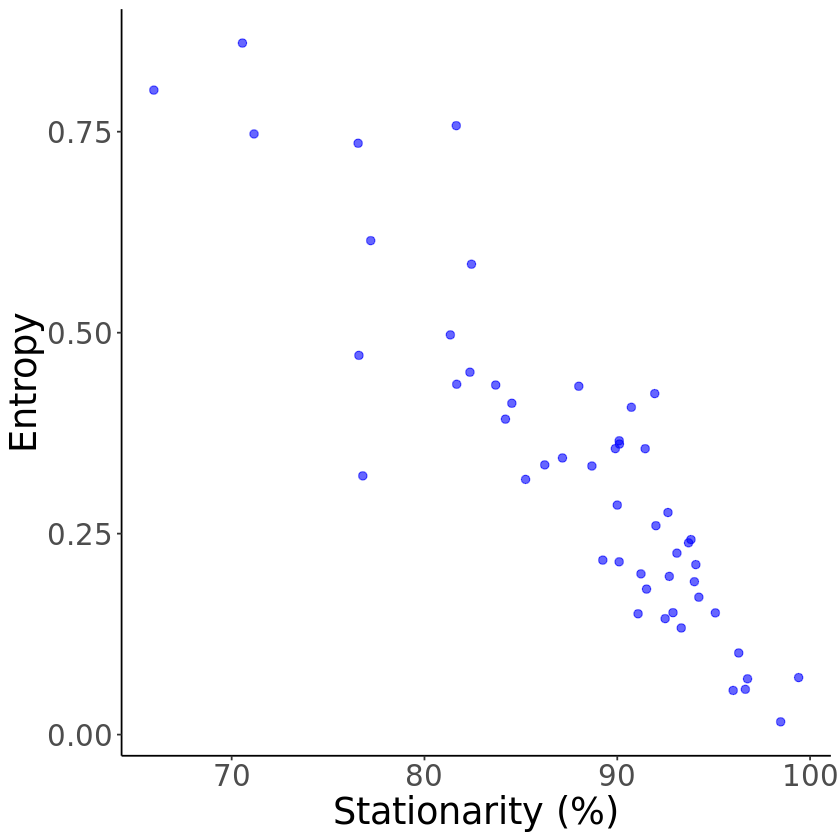

In [250]:
df_metrics %>%
    group_by(device_id) %>%
    ggplot(aes(x = stationarity, y = entropy)) +
    geom_point(shape = if_else(df_name == "shanghai", 1, 19), alpha = 0.6, colour = 'blue', size = 2, position = "jitter") +
    #geom_point(data=df_outliers_stationarity, shape=8, size=3, color = 'red') +    
    #geom_point(shape = 20, alpha = 0.6, colour = 'blue', size = 3) +
    #geom_point(data=df_outliers_stationarity, shape = 20, alpha = 0.6, colour = 'blue', size = 2) +        
    #lims(x = c(0.9, 1.0), y = c(0.0, 1.0)) +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5), 
        text = element_text(size=22),
        legend.justification = c(1, 0.01),
        legend.position = c(0.99, 0.01)
         ) +
    labs(y = "Entropy", x = "Stationarity (%)")

prefix <- "images/StationarityEntropy"
fname <- paste(prefix, df_name, df_type, ".pdf", sep="_")
ggsave(plot=last_plot(), filename = fname, device = "pdf")
embedFonts(fname)

In [251]:
# Outliers with respect to diversity

df_outliers_diversity <- df_metrics %>%
    group_by(device_id) %>%
    summarise(entropy = mean(entropy), diversity = mean(diversity)) %>%
    # We select 5 outliers for the GPS and 20 for the CDR dataset
    top_n(if_else(df_name == "shanghai", 20, 5), diversity)

In [252]:
df_outliers_diversity

device_id,entropy,diversity
<dbl>,<dbl>,<dbl>
8,0.7472214,0.9935893
10,0.7356243,0.9908871
22,0.4348466,0.9904178
24,0.8017737,0.9922586
59,0.4717365,0.9907650


Saving 6.67 x 6.67 in image


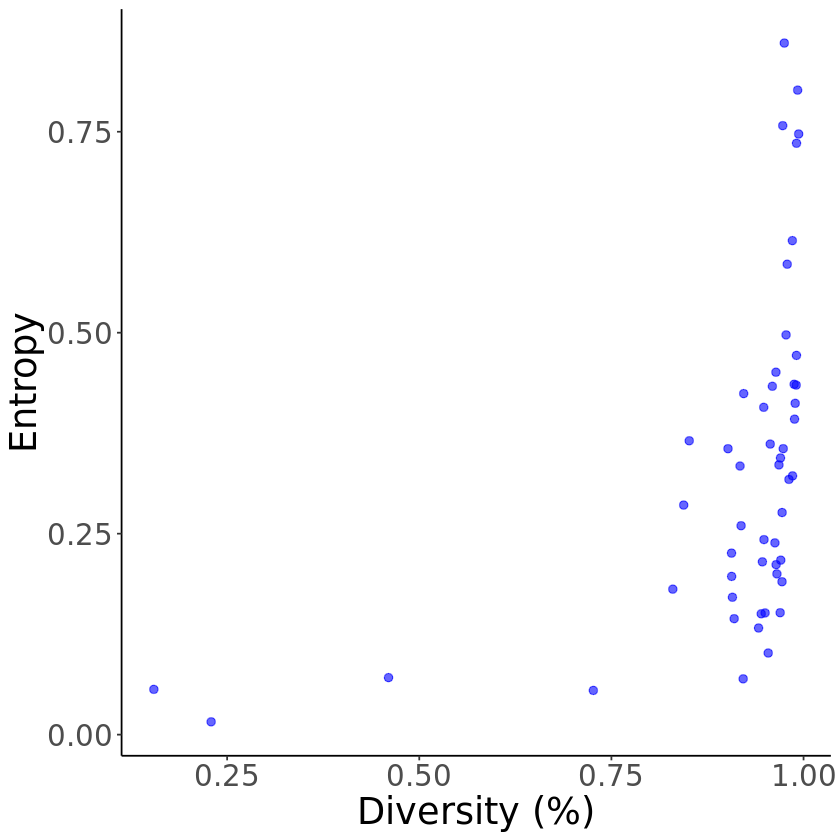

In [253]:
df_metrics %>%
    group_by(device_id) %>%
    ggplot(aes(x = diversity, y = entropy)) +
    geom_point(shape = if_else(df_name == "shanghai", 1, 19), alpha = 0.6, colour = 'blue', size = 2, position = "jitter") +
    #geom_point(data=df_outliers_stationarity, shape=8, size=3, color = 'red') +    
    #geom_point(shape = 20, alpha = 0.6, colour = 'blue', size = 3) +
    #geom_point(data=df_outliers_stationarity, shape = 20, alpha = 0.6, colour = 'blue', size = 2) +        
    #lims(x = c(0.9, 1.0), y = c(0.0, 1.0)) +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5), 
        text = element_text(size=22),
        legend.justification = c(1, 0.01),
        legend.position = c(0.99, 0.01)
         ) +
    labs(y = "Entropy", x = "Diversity (%)")

prefix <- "images/DiversityEntropy"
fname <- paste(prefix, df_name, df_type, ".pdf", sep="_")
ggsave(plot=last_plot(), filename = fname, device = "pdf")
embedFonts(fname)

Saving 6.67 x 6.67 in image


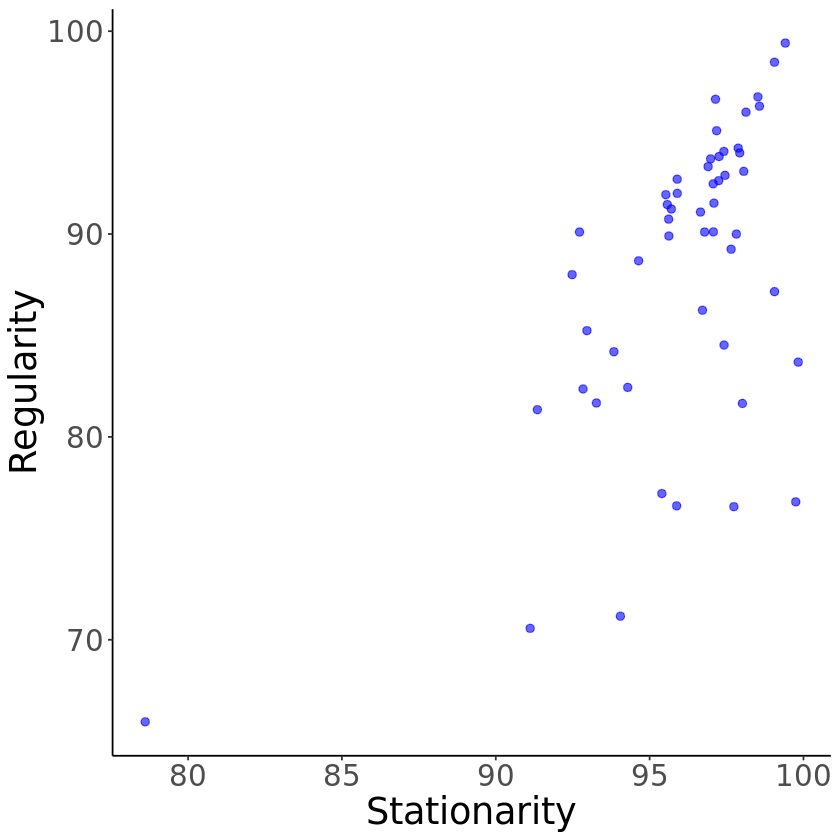

In [254]:
# Regularity versus stationarity (for each user)

df_metrics %>%
    group_by(device_id) %>%
    ggplot(aes(x = regularity, y = stationarity)) +
    geom_point(shape = if_else(df_name == "shanghai", 1, 19), alpha = 0.6, colour = 'blue', size = 2, position = "jitter") +
    #geom_point(shape = 20, alpha = 0.6, colour = 'blue', size = 3) + # CDR
    #lims(x = c(0.9, 1.0), y = c(0.0, 1.0)) + # CDR
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5), 
        text = element_text(size=22),
        legend.justification = c(1, 0.01),
        legend.position = c(0.99, 0.01)
         ) +
    labs(y = "Regularity", x = "Stationarity")

prefix <- "images/RegularityStationarity"
fname <- paste(prefix, df_name, df_type, ".pdf", sep="_")
ggsave(plot=last_plot(), filename = fname, device = "pdf")
embedFonts(fname)

Saving 6.67 x 6.67 in image


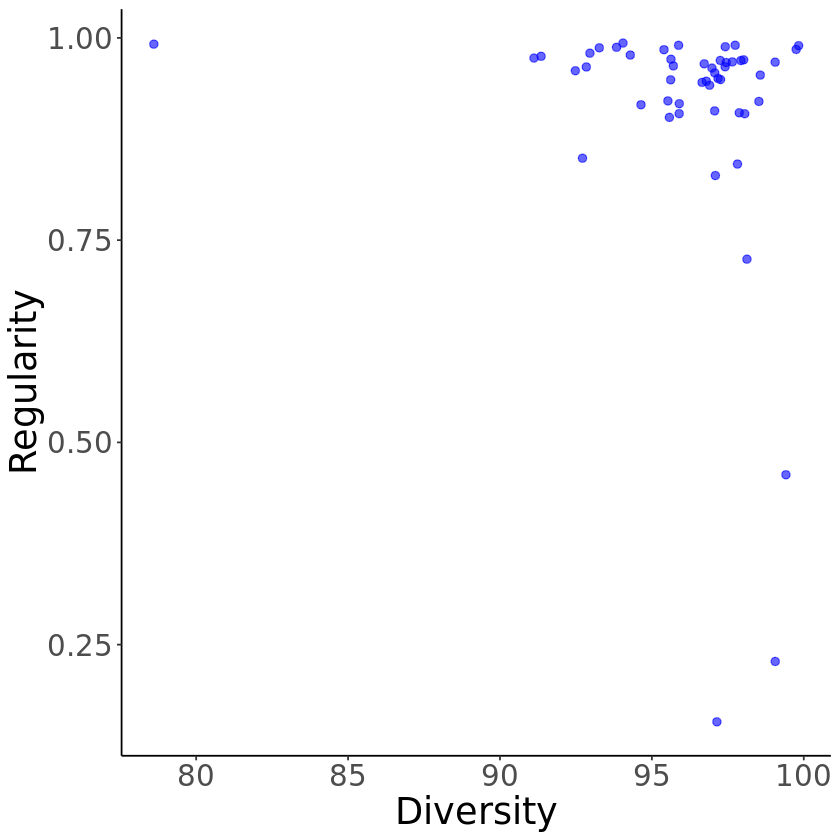

In [255]:
# Regularity versus diversity (for each user)

df_metrics %>%
    group_by(device_id) %>%
    ggplot(aes(x = regularity, y = diversity)) +
    geom_point(shape = if_else(df_name == "shanghai", 1, 19), alpha = 0.6, colour = 'blue', size = 2, position = "jitter") +
    #geom_point(shape = 20, alpha = 0.6, colour = 'blue', size = 3) +
    #lims(x = c(0.9, 1.0), y = c(0.0, 1.0)) +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5), 
        text = element_text(size=22),
        legend.justification = c(1, 0.01),
        legend.position = c(0.99, 0.01)
         ) +
    labs(y = "Regularity", x = "Diversity")

prefix <- "images/RegularityDiversity"
fname <- paste(prefix, df_name, df_type, ".pdf", sep="_")
ggsave(plot=last_plot(), filename = fname, device = "pdf")
embedFonts(fname)

Saving 6.67 x 6.67 in image


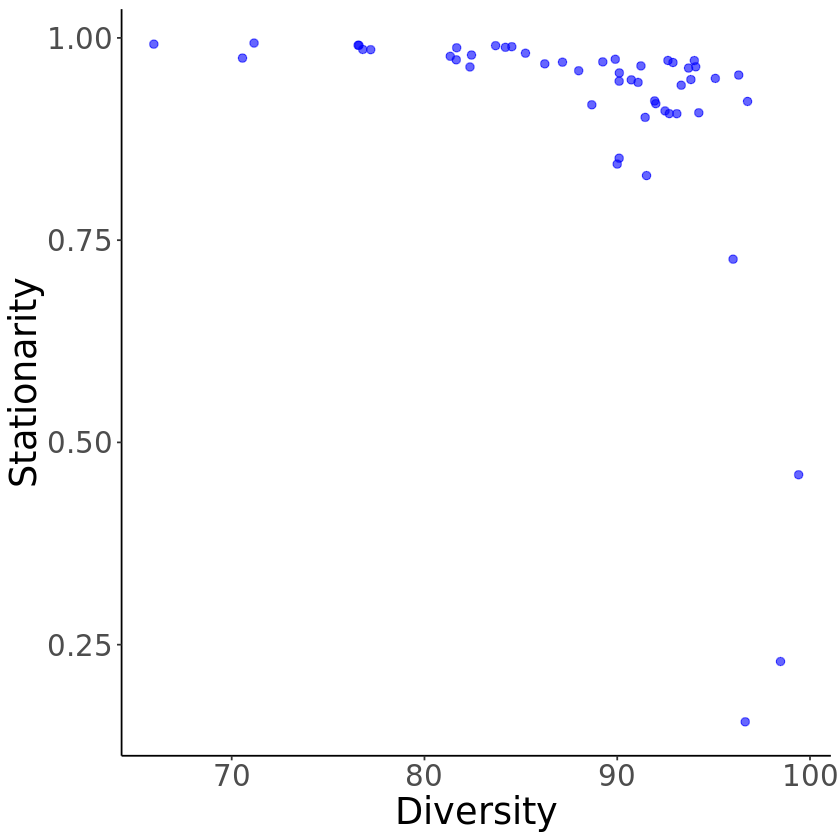

In [256]:
# Stationarity versus diversity (for each user)

df_metrics %>%
    group_by(device_id) %>%
    ggplot(aes(x = stationarity, y = diversity)) +
    geom_point(shape = if_else(df_name == "shanghai", 1, 19), alpha = 0.6, colour = 'blue', size = 2) +
    #geom_point(shape = 20, alpha = 0.6, colour = 'blue', size = 3) +
    #lims(x = c(0.9, 1.0), y = c(0.0, 1.0)) +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5), 
        text = element_text(size=22),
        legend.justification = c(1, 0.01),
        legend.position = c(0.99, 0.01)
         ) +
    labs(y = "Stationarity", x = "Diversity")

prefix <- "images/StationarityDiversity"
fname <- paste(prefix, df_name, df_type, ".pdf", sep="_")
ggsave(plot=last_plot(), filename = fname, device = "pdf")
embedFonts(fname)

# Spatio-temporal interplay

In [257]:
df %>%
    group_by(device_id) %>%
    summarise(reg200 = mean(regularity),
              reg300 = mean(regularity300),
              reg400 = mean(regularity400),
              reg500 = mean(regularity500),
              reg600 = mean(regularity600),
              reg700 = mean(regularity700),
              reg800 = mean(regularity800),
              reg900 = mean(regularity900),
              reg1000 = mean(regularity1000)
             ) %>%
    summarise(reg200 = mean(reg200),
              reg300 = mean(reg300),
              reg400 = mean(reg400),
              reg500 = mean(reg500),
              reg600 = mean(reg600),
              reg700 = mean(reg700),
              reg800 = mean(reg800),
              reg900 = mean(reg900),
              reg1000 = mean(reg1000)
             )

reg200,reg300,reg400,reg500,reg600,reg700,reg800,reg900,reg1000
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
96.02216,96.58216,97.00647,97.35294,97.57686,97.79824,97.94863,98.06804,98.21627


In [258]:
df %>%
    group_by(device_id) %>%
    summarise(st200 = mean(stationarity),
              st300 = mean(stationarity300),
              st400 = mean(stationarity400),
              st500 = mean(stationarity500),
              st600 = mean(stationarity600),
              st700 = mean(stationarity700),
              st800 = mean(stationarity800),
              st900 = mean(stationarity900),
              st1000 = mean(stationarity1000)
             ) %>%
    summarise(st200 = mean(st200),
              st300 = mean(st300),
              st400 = mean(st400),
              st500 = mean(st500),
              st600 = mean(st600),
              st700 = mean(st700),
              st800 = mean(st800),
              st900 = mean(st900),
              st1000 = mean(st1000)
             )

st200,st300,st400,st500,st600,st700,st800,st900,st1000
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
88.17784,88.41647,90.15314,92.36941,91.72922,93.09471,93.42647,93.85961,94.14569


In [259]:
df %>%
    group_by(device_id) %>%
    summarise(div200 = mean(diversity),
              div300 = mean(diversity300),
              div400 = mean(diversity400),
              div500 = mean(diversity500),
              div600 = mean(diversity600),
              div700 = mean(diversity700),
              div800 = mean(diversity800),
              div900 = mean(diversity900),
              div1000 = mean(diversity1000)
             ) %>%
    summarise(div200 = mean(div200),
              div300 = mean(div300),
              div400 = mean(div400),
              div500 = mean(div500),
              div600 = mean(div600),
              div700 = mean(div700),
              div800 = mean(div800),
              div900 = mean(div900),
              div1000 = mean(div1000)
             )

div200,div300,div400,div500,div600,div700,div800,div900,div1000
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9075969,0.9036246,0.9024057,0.8774816,0.890569,0.8854523,0.8724501,0.8847554,0.8682015


In [260]:
df %>%
    group_by(device_id) %>%
    summarise(ent200 = mean(actual_entropy),
              ent300 = mean(actual_entropy300),
              ent400 = mean(actual_entropy400),
              ent500 = mean(actual_entropy500),
              ent600 = mean(actual_entropy600),
              ent700 = mean(actual_entropy700),
              ent800 = mean(actual_entropy800),
              ent900 = mean(actual_entropy900),
              ent1000 = mean(actual_entropy1000)
             ) %>%
    summarise(ent200 = mean(ent200),
              ent300 = mean(ent300),
              ent400 = mean(ent400),
              ent500 = mean(ent500),
              ent600 = mean(ent600),
              ent700 = mean(ent700),
              ent800 = mean(ent800),
              ent900 = mean(ent900),
              ent1000 = mean(ent1000)
             )

ent200,ent300,ent400,ent500,ent600,ent700,ent800,ent900,ent1000
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3287179,0.3152674,0.280448,0.2344917,0.2569477,0.2289489,0.2158823,0.208034,0.2065611


In [261]:
mean(df$actual_entropy)

[1] 0.3268643

In [262]:
df %>%
    group_by(device_id) %>%
    summarise(pred200 = mean(actual_predictability),
              pred300 = mean(actual_predictability300),
              pred400 = mean(actual_predictability400),
              pred500 = mean(actual_predictability500),
              pred600 = mean(actual_predictability600),
              pred700 = mean(actual_predictability700),
              pred800 = mean(actual_predictability800),
              pred900 = mean(actual_predictability900),
              pred1000 = mean(actual_predictability1000)
             ) %>%
    summarise(pred200 = mean(pred200),
              pred300 = mean(pred300),
              pred400 = mean(pred400),
              pred500 = mean(pred500),
              pred600 = mean(pred600),
              pred700 = mean(pred700),
              pred800 = mean(pred800),
              pred900 = mean(pred900),
              pred1000 = mean(pred1000)
             )

pred200,pred300,pred400,pred500,pred600,pred700,pred800,pred900,pred1000
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9737255,0.9742549,0.977451,0.9812157,0.9788235,0.9811373,0.9824314,0.9828431,0.9827451
